In [1]:
!pip install wordfreq --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 11.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.4/401.4 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 18.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.1 MB/s eta 0:00:00m eta 0:00:010:01


In [23]:
import wordfreq
# print top 1000 words with their frequencies
words =  wordfreq.top_n_list('en', 100000)
wordfreq.zipf_frequency('the', 'en')
import numpy as np
def letter_to_num(letter):
    if letter == ' ':
        return 0
    if letter == '?':
        return 27
    return ord(letter) - 96
freqs = np.zeros((28, 28, 28, 28), dtype=np.float64)
def word_to_quads(word):
    word = "?? " + word + " "
    quads = []
    for i in range(len(word) - 3):
        quads.append(word[i:i+4])
    quads = [[letter_to_num(letter) for letter in quad] for quad in quads]
    return quads

In [24]:
for word in words:
    if not all(letter in 'abcdefghijklmnopqrstuvwxyz' for letter in word):
        continue
    freq = wordfreq.word_frequency(word, 'en')
    quads = word_to_quads(word)
    for quad in quads:
        freqs[tuple(quad)] += freq
    

In [28]:
freqs[5, 12, 5, 16]
# broadcast "?? x" across ??
freqs[:, :, 0, :] = freqs[:, :, 0, :].sum(axis=(0,1), keepdims=True)
# broadcast "? xx" across ?
freqs[:, 0, :, :] = freqs[:, 0, :, :].sum(axis=(0,), keepdims=True)

In [29]:
freqs += 1e-10
freqs /= freqs.sum(axis=(3,), keepdims=True)

In [33]:
(1,2) + (2,3)

(1, 2, 2, 3)

<BarContainer object of 28 artists>

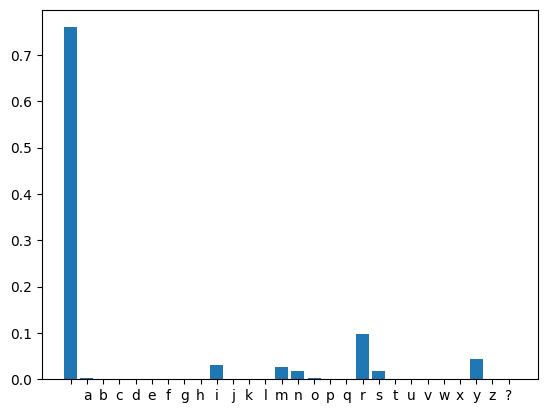

In [37]:
def num_to_letter(num):
    if num == 0:
        return ' '
    if num == 27:
        return '?'
    return chr(num + 96)
def get_cond_probs(trigram):
    return {num_to_letter(i): freqs[trigram + (i,)] for i in range(28)}

# a=1, b=2
# the = (20, 8, 5, 0)
conds = get_cond_probs((20, 8, 5))

import matplotlib.pyplot as plt

# plot a bar chart of the conditional probabilities labelling the x-axis with the letters
plt.bar(conds.keys(), conds.values())


In [41]:
dummy_matrix = np.array([[0.0, 1.0], [2.0, 6.0]], dtype=np.float64)
dummy_bytes = freqs.tobytes()
with open('dummy_matrix', 'wb') as f:
    f.write(dummy_bytes)